# C1W4: Handling Complex Images - Happy or Sad Dataset

* https-deeplearning-ai/**tensorflow-1-public**/C1/W4/assignment/[C1W4_Assignment.ipynb](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W4/assignment/C1W4_Assignment.ipynb)
* Commit `c203f11` on Jun 20, 2022, [Compare](https://github.com/https-deeplearning-ai/tensorflow-1-public/compare/c203f11..)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

## Load and explore the data

Sample happy image:


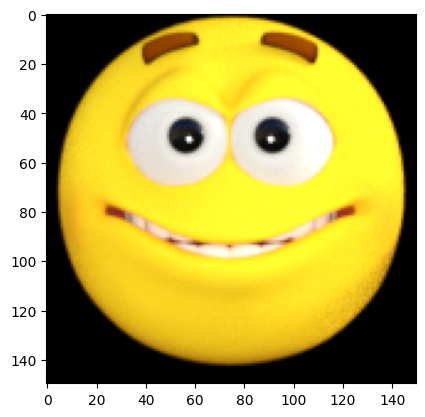


Sample sad image:


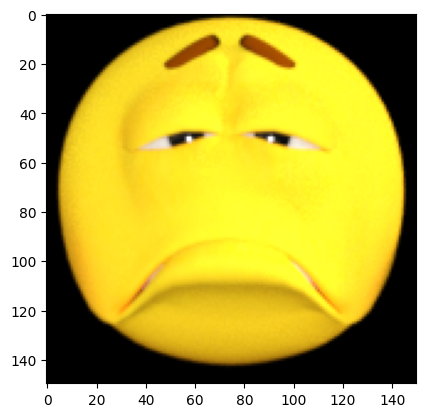

In [2]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "./data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array

sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


## Defining the callback

In [4]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

## Pre-processing the data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator():
    
    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(directory=base_dir,
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode='binary')
    return train_generator

In [6]:
gen = image_generator()

Found 80 images belonging to 2 classes.


## Creating and training your model

In [7]:
from tensorflow.keras import optimizers, losses

def train_happy_sad_model(train_generator):

    callbacks = myCallback()

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')])

    model.compile(loss=losses.BinaryCrossentropy(),
                  optimizer=optimizers.RMSprop(),
                  metrics=['accuracy']) 
    
    history = model.fit(x=train_generator,
                        epochs=20,
                        callbacks=[callbacks]) 
    
    return history

In [8]:
hist = train_happy_sad_model(gen)

Epoch 1/20
8/8 [==============================] - 3s 18ms/step - loss: 0.9556 - accuracy: 0.6125
Epoch 2/20
8/8 [==============================] - 0s 20ms/step - loss: 0.5133 - accuracy: 0.7875
Epoch 3/20
8/8 [==============================] - 0s 18ms/step - loss: 0.2960 - accuracy: 0.8875
Epoch 4/20
8/8 [==============================] - 0s 21ms/step - loss: 0.1908 - accuracy: 0.9500
Epoch 5/20
8/8 [==============================] - 0s 19ms/step - loss: 0.1440 - accuracy: 0.9375
Epoch 6/20
8/8 [==============================] - 0s 18ms/step - loss: 0.1071 - accuracy: 0.9375
Epoch 7/20
8/8 [==============================] - 0s 25ms/step - loss: 0.0942 - accuracy: 0.9875
Epoch 8/20
8/8 [==============================] - 0s 19ms/step - loss: 0.1130 - accuracy: 0.9625
Epoch 9/20
7/8 [=========================>....] - ETA: 0s - loss: 0.0350 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!
8/8 [==============================] - 0s 19ms/step - loss: 0.0314 - accuracy: 1.0000

In [9]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 9 epochs


In [10]:
if not "accuracy" in hist.model.metrics_names:
    print("Use 'accuracy' as metric when compiling your model.")
else:
    print("The metric was correctly defined.")

The metric was correctly defined.
